In [1]:
# let's make a dummy trajectory
from trajectory_optimization.track import Track
import numpy as np

track = Track("../data/tracks/vivatech_2023.dxf")

desired_speed = 4 # m/s
control_freq = 20 # Hz
distance_per_hz = 4/20
nb_points = int(track.center.length // distance_per_hz)

In [9]:
distances = np.linspace(0, track.center.length, nb_points)
traj_points = [track.center.interpolate(d) for d in distances]

In [35]:
import math

def compute_angles(point_list):
    # Initialize the list to store the angles
    angles = []

    # Loop through the point list
    for i in range(len(point_list) - 1):
        # Get the current point and the next point
        p1 = point_list[i]
        p2 = point_list[i + 1]

        # Calculate the difference in x and y coordinates
        dx = p2.x - p1.x
        dy = p2.y - p1.y

        # Compute the angle in radians between the x-axis and the line connecting the points (using the atan2 function for a correct quadrant)
        angle_radians = math.atan2(dy, dx)
        
        # Convert the angle to degrees
        angle_degrees = math.degrees(angle_radians)

        # Normalize the angle to be between 0 and 360
        if angle_degrees < 0:
            angle_degrees += 360

        # Append the angle to the list
        angles.append(angle_degrees)

    # Return the list of angles
    return angles

In [40]:
len(traj_points)

227

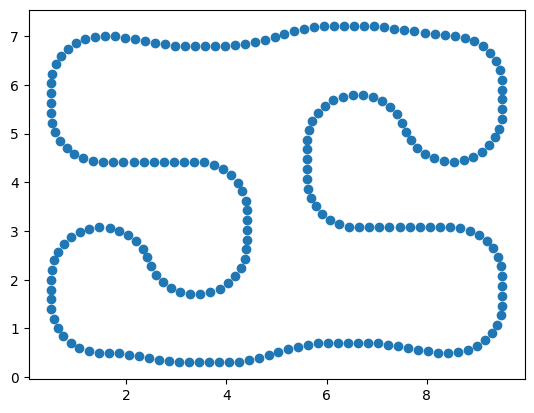

In [42]:
import matplotlib.pyplot as plt

angles = compute_angles(traj_points)

traj = np.array([[p.x, p.y, yaw] for p, yaw in zip(traj_points[:-1], angles)])

plt.scatter(x = traj[:, 0], y = traj[:, 1])
plt.show()

In [48]:
car_orientations = traj[:, -1].reshape(-1, 1)  # List of Euler(yaw) for each frame
print(car_orientations.shape)
car_orientations = np.pad(car_orientations, ((0,0), (2,0))) 

(226, 1)


In [43]:
np.savetxt("centerline_traj.txt", traj)

In [27]:
np.savetxt("inner.txt", np.array(track.inner.coords))
np.savetxt("outer.txt", np.array(track.outer.coords))

In [33]:
inner = np.array(track.inner.coords)
inner = np.pad(inner, ((0,0), (0,1)))

print(inner.shape)

(12036, 3)
